<a href="https://colab.research.google.com/github/gauravdas014/surveywebsite/blob/main/1912018_CS401_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUBMITTED BY: GAURAV BHATTACHARJEE | 1912018 | CSE-A 
Link to Colab notebook: https://colab.research.google.com/drive/1rJd8PhVu7PckEqVpVBCYw5KmkhK8dOpl?usp=sharing


# Assignment II: AI Based Chatbot System
Instructions:
1. Use RASA Framework: https://rasa.com/.
2. Develop an AI Chabot system based on regional languages.
3. Submit one page report after checking your system.


# Theory

- A **chatbot** is a computer program that simulates and processes human conversation (either written or spoken), allowing humans to interact with digital devices as if they were communicating with a real person. Chatbots can be as simple as rudimentary programs that answer a simple query with a single-line response, or as sophisticated as digital assistants that learn and evolve to deliver increasing levels of personalization as they gather and process information. 

- Rasa is a tool to build custom AI chatbots using Python and natural language understanding (NLU). Rasa provides a framework for developing AI chatbots that uses natural language understanding (NLU). It also allows the user to train the model and add custom actions. 

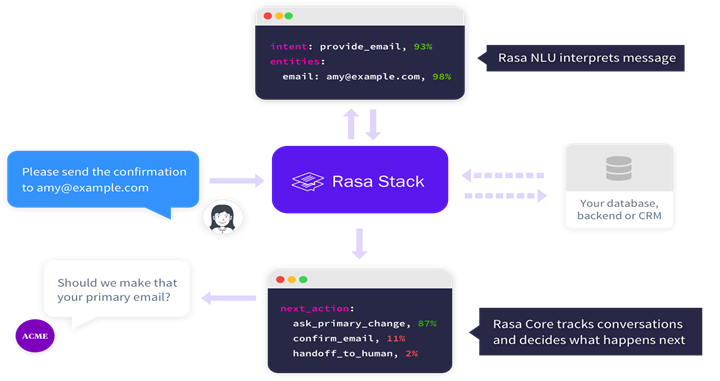

- Rasa has two main components
  - **Rasa NLU (Natural Language Understanding):** Rasa NLU is an open-source natural language processing tool for intent classification (decides what the user is asking), extraction of the entity from the bot in the form of structured data and helps the chatbot understand what user is saying.
  - **Rasa Core:** It is a chatbot framework with machine learning-based dialogue management which takes the structured input from the NLU and predicts the next best action using a probabilistic model like LSTM neural network rather than if/else statement. Underneath the hood,  it also uses reinforcement learning to improve the prediction of the next best action. 

-  Chatbots built using Rasa deployed on multiple platforms like Facebook messenger and Slack.

- Here, we create chatbot for Hotel Management, that interacts with the user in Bengali language. 

# Steps

## Step 1: Installing dependencies and setting up environment

In [ ]:
# Installing RASA 

# Note: Kindly ignore the red boxes drawn around ! and ? symbols in the PDF - it is a harmless bug in the notebook to PDF conversion program
!pip install rasa==1.10.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 510 kB 5.3 MB/s 
     |████████████████████████████████| 174 kB 57.3 MB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 132 kB 58.1 MB/s 
     |████████████████████████████████| 101 kB 11.0 MB/s 
     |████████████████████████████████| 1.2 MB 50.0 MB/s 
     |████████████████████████████████| 1.3 MB 41.7 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 979 kB 42.9 MB/s 
     |████████████████████████████████| 417 kB 68.8 MB/s 
     |████████████████████████████████| 509 kB 66.2 MB/s 
     |████████████████████████████████| 375 kB 73.1 MB/s 
     |████████████████████████████████| 111 kB 58.8 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 

In [ ]:
# Downgrading table from 3.7.0 to 3.6.1
!pip install -U tables==3.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.4 MB/s 
  Attempting uninstall: tables
    Found existing installation: tables 3.7.0
    Uninstalling tables-3.7.0:
      Successfully uninstalled tables-3.7.0


In [ ]:
# Upgrade ipython to avoid crashing colab session
!pip install -U ipython

# After installing ipython, click "RESTART RUNTIME" button in cell output and run everything as usual

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 62.1 MB/s 
  Attempting uninstall: ipython
    Found existing installation: ipython 7.9.0
    Uninstalling ipython-7.9.0:
      Successfully uninstalled ipython-7.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.9.0, but you have ipython 7.34.0 which is incompatible.


**Click on above "RESTART RUNTIME" button**

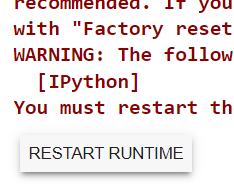

In [ ]:
# Downloading spacy 
!python -m spacy download en

2022-10-07 04:15:23.986172: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-07 04:15:23.987280: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-10-07 04:15:23.987322: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://p

In [ ]:
# Installing nest_asyncio
!pip install nest_asyncio==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import rasa
import nest_asyncio

# Preparing event loop
nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


## Step 2: Creating a basic rasa project

In [ ]:
from rasa.cli.scaffold import create_initial_project

In [ ]:
project = "test-project"
create_initial_project(project)

In [ ]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['__init__.py', 'tests', 'credentials.yml', 'config.yml', 'domain.yml', 'data', '__pycache__', 'endpoints.yml', 'actions.py']


In [ ]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


## Step 3: Configuring the chatbot

The following files were opened and altered as specified:

- **data/nlu.md**: 
  - NLU training data consists of example user utterances categorized by intent. Training examples can also include entities. Entities are structured pieces of information that can be extracted from a user's message. 
  - In this file, we specify the following intents: *checkin_timings, checkout_timings, cancel_reservation, breakfast, lunch, dinner, meal_times, clean, double_seater, single_seater, num_room, booking, greet* and *goodbye* and keep under each intent label, the queries/messages containing that particular intent in the tone/text. 



In [ ]:
# Overwriting data/nlu.md
%%writefile data/nlu.md

## intent:checkin_timings
- চেকইন এর সময় বলুন
- চেকইন এর সময়? 
- আপনি কি আমাকে হোটেলের চেকইন এর সময় বলবেন?
- চেকইন এর সময় বলবেন? 

## intent:checkout_timings
- চেকআউট এর সময় বলুন
- চেকআউট এর সময়? 
- আপনি কি আমাকে হোটেলের চেকআউট এর সময় বলবেন?
- চেকআউট এর সময় বলবেন? 

## intent:cancel_reservation
- আমি রিজার্ভেশন বাতিল করতে চাই
- রিজার্ভেশন বাতিল করতে চাই
- আমি কিভাবে রিজার্ভেশন বাতিল করব

## intent:breakfast
- নাস্তা পাঠান
- নাস্তা দিন 
- নাস্তা পাঠাতে পারবেন?
- আমি নাস্তা করতে চাই

## intent:lunch
- লাঞ্চ পাঠান
- লাঞ্চ দিন 
- লাঞ্চ পাঠাতে পারবেন?
- আমি লাঞ্চ করতে চাই
- দুপুরের খাবার পাঠান
- দুপুরের খাবার দিন 
- দুপুরের খাবার পাঠাতে পারবেন?
- আমি দুপুরের খাবার খেতে চাই

## intent:dinner
- ডিনার পাঠান
- ডিনার দিন 
- ডিনার পাঠাতে পারবেন?
- আমি ডিনার করতে চাই
- রাতের খাবার পাঠান
- রাতের খাবার দিন 
- রাতের খাবার পাঠাতে পারবেন?
- আমি রাতের খাবার খেতে চাই

## intent:meal_times
- খাবার সময় কি?
- আপনি কি আমাকে হোটেলের খাবারের সময় বলতে পারেন?
- খাবার সময়? 


## intent:clean
- একটি ক্লিনার পাঠান
- আপনি একটি ক্লিনার পাঠাতে পারেন?


## intent:double_seater
- দুজনের জন্য রুম আছে?
- দুজনের জন্য রুম হবে?
- দুজনের জন্য রুম চাই
- ডাবল সিটার রুম আছে?
- ডাবল সিটার রুম হবে?
- ডাবল সিটার রুম চাই

## intent:single_seater
- একজনের জন্য রুম আছে?
- একজনের জন্য রুম হবে?
- একজনের জন্য রুম চাই
- সিঙ্গেল সিটার রুম আছে?
- সিঙ্গেল সিটার রুম হবে?
- সিঙ্গেল সিটার রুম চাই

## intent:num_room
- আমার [2](number) রুম চাই
- [3](number) রুম 
- [4](number) রুম হবে?


## intent:booking
- আমি একটি রুম বুক করতে চাই
- রুম বুক করতে চাই
- খালি রুম হবে?

## intent:greet
- হে
- হ্যালো
- হাই

## intent:goodbye
- বিদায়
- আমি যাচ্ছি

Overwriting data/nlu.md


- **domain.yml:** 
  - The domain defines the universe in which the chatbot operates. It specifies the intents, entities, slots, responses, forms, and actions the bot should know about. It also defines a configuration for conversation sessions. 
  - Here, we list all the intent labels that were specified in the *data/nlu.md* file, and for each intent label, we specify an appropriate response. 

In [ ]:
# Overwriting domain.yml
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - booking
  - num_room
  - single_seater
  - double_seater
  - clean
  - checkin_timings
  - checkout_timings
  - cancel_reservation
  - breakfast
  - lunch
  - dinner
  - meal_times
responses:
  utter_breakfast:
  - text: "আমি তাদের জানিয়ে দিয়েছি। সকালের নাস্তা ৫ মিনিটের মধ্যে পৌঁছে যাবে।"

  utter_lunch:
  - text: "আমি তাদের জানিয়ে দিয়েছি। দুপুরের খাবার ৫ মিনিটের মধ্যে পৌঁছে যাবে।"

  utter_dinner:
  - text: "আমি তাদের জানিয়ে দিয়েছি। রাতের খাবার ৫ মিনিটের মধ্যে পৌঁছে যাবে।"

  utter_meal_times:
  - text: "নাস্তা: 6 AM - 9 AM; লাঞ্চ: 12 PM - 2 PM; ডিনার: 8 PM - 10 PM। সপ্তাহের 7 দিন।"
  
  utter_checkin_timings:
  - text: "চেকইন করার সময় বিকাল ৪টা - 4 PM । অনুগ্রহ করে রিসেপশনিস্টের সাথে যোগাযোগ করুন।"

  utter_checkout_timings:
  - text: "চেকআউটের সময় সকাল ১১টা - 11 AM । অনুগ্রহ করে রিসেপশনিস্টের সাথে যোগাযোগ করুন।"
  
  utter_cancel_reservation:
  - text: "এটা করুন - ওয়েবসাইটের Reservations লিঙ্কে ক্লিক করুন এবং স্ক্রিনে প্রদর্শিত নির্দেশাবলী অনুসরণ করুন"

  utter_clean:
  - text: "আমি তাদের জানিয়ে দিয়েছি। ক্লিনার ৫ মিনিটের মধ্যে পৌঁছে যাবে।"

  utter_double_seater:
  - text: "10টি ডাবল সিটার রুম আছে। ভাড়া পড়বে 7000 টাকা।"

  utter_single_seater:
  - text: "4টি সিঙ্গেল সিটার রুম আছে। ভাড়া পড়বে 15000 টাকা।"

  utter_num_room:
  - text: "সিঙ্গেল সিটার নাকি ডাবল সিটার?"

  utter_booking:
  - text: "আপনি কয়টি রুম চান?"

  utter_greet:
  - text: "আরে! আমি কিভাবে আপনাকে সাহায্য করতে পারি?"

  utter_goodbye:
  - text: "বিদায়! আবার দেখা হবে!"

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


- **data/stories.md**: 
  - Stories are representations of conversations between a user and a conversational assistant. They are used to train the dialogue management model. They are used to train a machine learning model to identify patterns in conversations and generalize to unseen conversation paths.   
  - Here, we specify scenarios/stories for check in, check out, cancellation of reservation, requesting for meals, booking rooms and greeting as follows. 

In [ ]:
# Overwriting data/stories.md
%%writefile data/stories.md

## check_in
* greet
  - utter_greet
* checkin_timings
  - utter_checkin_timings

## check_out
* greet
  - utter_greet
* checkout_timings
  - utter_checkout_timings

## cancel_reservation
* greet
  - utter_greet
* cancel_reservation
  - utter_cancel_reservation


## breakfast
* greet
  - utter_greet
* breakfast
  - utter_breakfast

## mealtimes
* greet
  - utter_greet
* meal_times
  - utter_meal_times

## clean
* greet
  - utter_greet
* clean
  - utter_clean


## book_single_seater_room
* greet
  - utter_greet
* booking
  - utter_booking
* num_room
  - utter_num_room
* single_seater 
  - utter_single_seater

## book_double_seater_room
* greet
  - utter_greet
* booking
  - utter_booking
* num_room
  - utter_num_room
* double_seater
  - utter_double_seater

## say goodbye
* goodbye
  - utter_goodbye


Overwriting data/stories.md


## Step 4: Training the model

In [ ]:
# Training the rasa chatbot model 
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

Processed Story Blocks:   0%|          | 0/9 [00:00<?, ?it/s, # trackers=40]

Training Core model...


Processed trackers: 100%|██████████| 9/9 [00:00<00:00, 90.60it/s, # actions=25]
Processed actions: 25it [00:00, 403.25it/s, # examples=25]
Epochs: 100%|██████████| 100/100 [00:26<00:00,  3.83it/s, t_loss=0.156, loss=0.073, acc=1.000]


Core model training completed.
NLU data/configuration did not change. No need to retrain NLU model.
Your Rasa model is trained and saved at '/content/test-project/models/20221007-042520.tar.gz'.
models/20221007-042520.tar.gz


## Step 5: Interacting with the chatbot

In [ ]:
# Interacting with the chatbot
from rasa.jupyter import chat
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
হ্যালো
আরে! আমি কিভাবে আপনাকে সাহায্য করতে পারি?
রুম বুক করতে চাই
আপনি কয়টি রুম চান?
আমার 3 রুম চাই
সিঙ্গেল সিটার নাকি ডাবল সিটার?
ডাবল সিটার রুম হবে?
4টি সিঙ্গেল সিটার রুম আছে। ভাড়া পড়বে 15000 টাকা।
চেকইন এর সময় বলুন
চেকইন করার সময় বিকাল ৪টা - 4 PM । অনুগ্রহ করে রিসেপশনিস্টের সাথে যোগাযোগ করুন।
বিদায়
বিদায়! আবার দেখা হবে!
/stop


# Conclusion

Thus, a chatbot was created for the purpose of Hotel Management and room booking, that interacts with the user in Bengali language and caters to their needs. 